# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Data path

training_file = 'traffic-signs-data/train.p'
validation_file='traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

# Load training, validation and test data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Split features and labels
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Total samples =  51839
Training samples/Total samples =  0.6712899554389552
Validation samples/Total samples =  0.08507108547618589
Test samples/Total samples =  0.24363895908485889


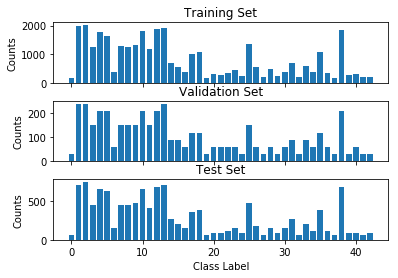

In [2]:
# Use Numpy method to explore dataset
import numpy as np
# Use pylot to visualize images
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Number of training examples
n_train = train['features'].shape[0]
# Number of validation examples
n_valid = valid['features'].shape[0]
# Number of testing examples.
n_test = test['features'].shape[0]

# Shape of a traffic sign image?
image_shape = train['features'].shape[1:4]

# Find unique classes/labels there are in the dataset.
# count the # of occurences of each label
lb_uniq_train, lb_cnts_train = np.unique(train['labels'], return_counts=True)
lb_uniq_valid, lb_cnts_valid = np.unique(valid['labels'], return_counts=True)
lb_uniq_test, lb_cnts_test = np.unique(test['labels'], return_counts=True)

# Number of classes in the dataset
n_classes = len(lb_uniq_train)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# total samples
n_tot = n_train+n_valid+n_test
print("Total samples = ", n_tot)

# data splits ratio 
r_train = n_train/n_tot
r_valid = n_valid/n_tot
r_test = n_test/n_tot

print("Training samples/Total samples = ", r_train)
print("Validation samples/Total samples = ", r_valid)
print("Test samples/Total samples = ", r_test)

# display the # of occurrences of each label 
plt.figure()
f, ax = plt.subplots(3, 1, sharex=True)
ax[0].bar(lb_uniq_train, lb_cnts_train)
ax[0].set_ylabel('Counts')
ax[0].set_title('Training Set')

ax[1].bar(lb_uniq_valid, lb_cnts_valid)
ax[1].set_ylabel('Counts')
ax[1].set_title('Validation Set')

ax[2].bar(lb_uniq_test, lb_cnts_test)
ax[2].set_xlabel('Class Label')
ax[2].set_ylabel('Counts')
ax[2].set_title('Test Set')
f.subplots_adjust(hspace=0.3)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

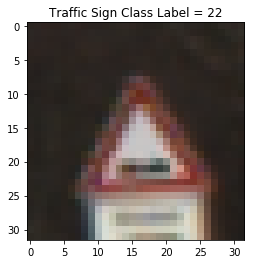

In [3]:
# randomly display a traffic image from the training set
img_indx = np.random.randint(0, n_train)
img_disp = X_train[img_indx]

plt.figure()
plt.imshow(img_disp)
plt.title('Traffic Sign Class Label = ' + str(y_train[img_indx]))




From the statistics on current training/validation/testing data splits, we see that some label classes have much less samples than others. For that reason, I decide to artificually generate more data sets for thos lesser ones so that the training, validation and testing data sets are less biased.
To do that, I do the following:
1. rebundle the training, validation and testing data together
2. generate artificial data on the new total dataset
3. re-split the data to training/validation/testing with the same ratio as before

Total samples =  51839


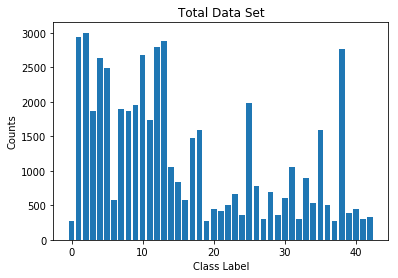

In [4]:
# rebundle the training, validation and testing data to ease data generation
X_tot = np.append(np.append(X_train, X_valid, axis=0), X_test, axis=0)
y_tot = np.append(np.append(y_train, y_valid), y_test)

# check the statistics again
lb_uniq_features, lb_cnts_labels = np.unique(y_tot, return_counts=True)
n_classes = len(lb_cnts_labels)

print('Total samples = ', len(X_tot))

plt.figure()
plt.bar(lb_uniq_features, lb_cnts_labels)
plt.xlabel('Class Label')
plt.ylabel('Counts')
plt.title('Total Data Set')

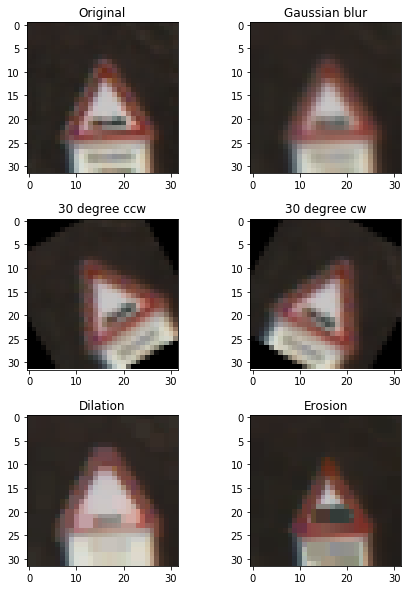

In [5]:
# now generate artifical data sets for each class
# what to generate for each class depends on how many of them we already have
# use openCV functions to help generate new data
import cv2

# function to generate new images
# depending on the new number of images, different filters are applied to the original image
def gen_images(img, i_class, img_shape, n_img=1):
    # gaussian blur
    img_tmp = cv2.GaussianBlur(img.copy(), (3, 3), 0) # 3x3 patch, sigma calculated by openCV
    img_tmp = img_tmp.reshape(((1, )+img_shape))
    X_new = img_tmp
    y_new = np.array([i_class])
    if n_img >= 2:
        # 30 degree counter-clockwise rotation
        rot_m = cv2.getRotationMatrix2D((img_shape[0]/2, img_shape[1]/2), 30, 1.0)
        img_tmp = cv2.warpAffine(img.copy(), rot_m, (img_shape[0], img_shape[1]))
        img_tmp = img_tmp.reshape(((1, )+img_shape))
        X_new = np.append(X_new, img_tmp, axis=0)
        y_new = np.append(y_new, i_class)
        if n_img >= 3:
            # 30 degree clockwise rotation
            rot_m = cv2.getRotationMatrix2D((img_shape[0]/2, img_shape[1]/2), -30, 1.0)
            img_tmp = cv2.warpAffine(img.copy(), rot_m, (img_shape[0], img_shape[1]))
            img_tmp = img_tmp.reshape(((1, )+img_shape))
            X_new = np.append(X_new, img_tmp, axis=0)
            y_new = np.append(y_new, i_class)
            if n_img >=4:
                # dilation
                img_tmp = cv2.dilate(img.copy(), None, 1) # use default 3x3 pixel patch
                img_tmp = img_tmp.reshape(((1, )+img_shape))
                X_new = np.append(X_new, img_tmp, axis=0)
                y_new = np.append(y_new, i_class)
                if n_img == 5:
                    # erosion
                    img_tmp = cv2.erode(img.copy(), None, 1) # use default 3x3 pixel patch
                    img_tmp = img_tmp.reshape(((1, )+img_shape))
                    X_new = np.append(X_new, img_tmp, axis=0)
                    y_new = np.append(y_new, i_class)
    
    return X_new, y_new


# a test for how new images are generated with the random image above
X_t, foo = gen_images(img_disp, None, image_shape, 5)

fig = plt.figure(figsize=(8,10))
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0)
a00 = fig.add_subplot(3,2,1)
a00.imshow(img_disp)
a00.set_title('Original')
a01 = fig.add_subplot(3,2,2)
a01.imshow(X_t[0])
a01.set_title('Gaussian blur')
a10 = fig.add_subplot(3,2,3)
a10.imshow(X_t[1])
a10.set_title('30 degree ccw')
a11 = fig.add_subplot(3,2,4)
a11.imshow(X_t[2])
a11.set_title('30 degree cw')
a20 = fig.add_subplot(3,2,5)
a20.imshow(X_t[3])
a20.set_title('Dilation')
a21 = fig.add_subplot(3,2,6)
a21.imshow(X_t[4])
a21.set_title('Erosion')

In [6]:
# used to enable new image generation
GEN_NEW_IMG = False

n_new_img = 0

if GEN_NEW_IMG:
    for i_class in range(n_classes):

        indices = (y_tot==i_class)
        len_class = sum(indices)

        if len_class <= 500:# if dataset less than 500, we generate 5 new images for each 300 random samples
            n_samples = 300
            X_sample = X_tot[indices]
            rnd_ind = np.random.randint(0, len(X_sample), n_samples)
        
            for x in X_sample[rnd_ind]:
                X_tmp, y_tmp = gen_images(x, i_class, image_shape, 5)
                if n_new_img==0:
                    X_new, y_new = X_tmp, y_tmp
                else:
                    X_new, y_new = np.append(X_new, X_tmp, axis=0), np.append(y_new, y_tmp)
                n_new_img += 5
        
        elif 500<len_class<=1000: # if dataset between 500 and 1000, we generate 4 for each 200 random samples
            n_samples = 200
            X_sample = X_tot[indices]
            rnd_ind = np.random.randint(0, len(X_sample), n_samples)
        
            for x in X_sample[rnd_ind]:
                X_tmp, y_tmp = gen_images(x, i_class, image_shape, 4)
                if n_new_img==0:
                    X_new, y_new = X_tmp, y_tmp
                else:
                    X_new, y_new = np.append(X_new, X_tmp, axis=0), np.append(y_new, y_tmp)
                n_new_img += 4

        elif 1000<len_class<=1500: # between 1000 and 1500, generate 3 for each 200 random samples
            n_samples = 200
            X_sample = X_tot[indices]
            rnd_ind = np.random.randint(0, len(X_sample), n_samples)
        
            for x in X_sample[rnd_ind]:
                X_tmp, y_tmp = gen_images(x, i_class, image_shape, 3)
                if n_new_img==0:
                    X_new, y_new = X_tmp, y_tmp
                else:
                    X_new, y_new = np.append(X_new, X_tmp, axis=0), np.append(y_new, y_tmp)
                n_new_img += 3
        else: # otherwise generate 3 for each random 100 images
            n_samples = 100
            X_sample = X_tot[indices]
            rnd_ind = np.random.randint(0, len(X_sample), n_samples)
        
            for x in X_sample[rnd_ind]:
                X_tmp, y_tmp = gen_images(x, i_class, image_shape, 3)
                if n_new_img==0:
                    X_new, y_new = X_tmp, y_tmp
                else:
                    X_new, y_new = np.append(X_new, X_tmp, axis=0), np.append(y_new, y_tmp)
            
                n_new_img += 3

    new_features = 'X_new.p'
    new_labels = 'y_new.p'

    with open(new_features, mode='wb') as f:
        pickle.dump(X_new, f)
    with open(new_labels, mode='wb') as f:
        pickle.dump(y_new, f)

Number of updated training examples = 58227
Number of updated validation examples = 7378
Number of updated testing examples = 21134
Total updated examples = 86739


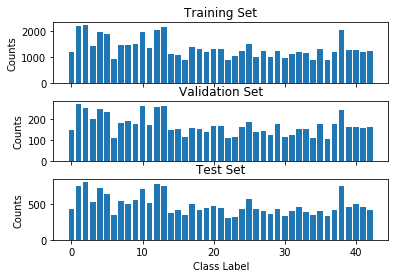

In [7]:
# shuffle data around
from sklearn.utils import shuffle
new_features = 'X_new.p'
new_labels = 'y_new.p'

with open(new_features, mode='rb') as f:
    X_new = pickle.load(f)
with open(new_labels, mode='rb') as f:
    y_new = pickle.load(f)

X_tot = np.append(X_tot, X_new, axis=0)
y_tot = np.append(y_tot, y_new)

X_tot, y_tot = shuffle(X_tot, y_tot)

n_tot = len(y_tot)

n_train = np.int(r_train*n_tot)
n_valid = np.int(r_valid*n_tot)
n_test = n_tot - n_train - n_valid

X_train, y_train = X_tot[0:n_train], y_tot[0:n_train]
X_valid, y_valid = X_tot[n_train:n_train+n_valid], y_tot[n_train:n_train+n_valid]
X_test, y_test = X_tot[n_train+n_valid:], y_tot[n_train+n_valid:]


# Find unique classes/labels there are in the dataset.
# count the # of occurences of each label
lb_uniq_train, lb_cnts_train = np.unique(y_train, return_counts=True)
lb_uniq_valid, lb_cnts_valid = np.unique(y_valid, return_counts=True)
lb_uniq_test, lb_cnts_test = np.unique(y_test, return_counts=True)

# Number of updated training examples
n_train = len(y_train)
# Number of updated validation examples
n_valid = len(y_valid)
# Number of updated testing examples.
n_test = len(y_test)


print("Number of updated training examples =", n_train)
print("Number of updated validation examples =", n_valid)
print("Number of updated testing examples =", n_test)
print("Total updated examples =", n_tot)

# display the # of occurrences of each label for updated dataset
plt.figure()
f, ax = plt.subplots(3, 1, sharex=True)
ax[0].bar(lb_uniq_train, lb_cnts_train)
ax[0].set_ylabel('Counts')
ax[0].set_title('Training Set')

ax[1].bar(lb_uniq_valid, lb_cnts_valid)
ax[1].set_ylabel('Counts')
ax[1].set_title('Validation Set')

ax[2].bar(lb_uniq_test, lb_cnts_test)
ax[2].set_xlabel('Class Label')
ax[2].set_ylabel('Counts')
ax[2].set_title('Test Set')
f.subplots_adjust(hspace=0.3)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

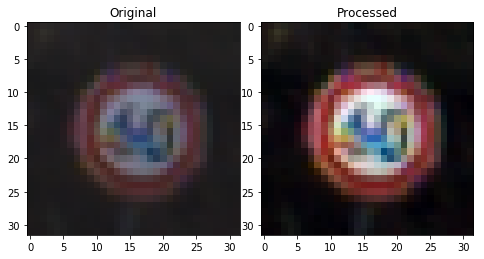

In [8]:
# Image pre-processing
# normalize RGB to normalized-RGB
def norm_rgb(img):
    "Here I am applying a max-min normalization for each channel to reduce light variations on images"
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    r_norm = (r-np.min(r))/(np.max(r)-np.min(r))*255.0
    g_norm = (g-np.min(g))/(np.max(g)-np.min(g))*255.0
    b_norm = (b-np.min(b))/(np.max(b)-np.min(b))*255.0
    
    return np.dstack((r_norm,g_norm,b_norm))
    

X_train_proc = np.zeros_like(X_train, dtype=float)
X_valid_proc = np.zeros_like(X_valid, dtype=float)
X_test_proc = np.zeros_like(X_test, dtype=float)


for i in range(n_train):
    X_train_proc[i] = norm_rgb(X_train[i])
    
for i in range(n_valid):
    X_valid_proc[i] = norm_rgb(X_valid[i])
    
for i in range(n_test):
    X_test_proc[i] = norm_rgb(X_test[i])

# check the output after the image process
img_indx = np.random.randint(0, n_train)
img_disp = X_train[img_indx]
img_disp_proc = X_train_proc[img_indx].squeeze()


fig = plt.figure(figsize=(8,10))
fig.subplots_adjust(wspace=0.1)
a00 = fig.add_subplot(1,2,1)
a00.imshow(img_disp.astype(np.uint8))
a00.set_title('Original')
a01 = fig.add_subplot(1,2,2)
a01.imshow(img_disp_proc.astype(np.uint8))
a01.set_title('Processed')


### Model Architecture

#### Define MyNet Architecture

In [9]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def MyNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.03
    drop_prob = 0.5 # random dropout rate
    f_size = 3 # field size for conv. layer
    
    conv_strd = [1, 1, 1, 1]
    conv_pad = 'VALID'
    
    pool_k    = [1, 2, 2, 1]
    pool_strd = [1, 1, 1, 1]
    pool_pad = 'VALID'
    
    # calculate output dimension of each layer
    c1_out_h = int(np.ceil(float(image_shape[0] - f_size + 1) / float(conv_strd[1])))
    c1_out_w = int(np.ceil(float(image_shape[1] - f_size + 1) / float(conv_strd[2])))
    c2_out_h = int(np.ceil(float(c1_out_h - f_size + 1) / float(conv_strd[1])))
    c2_out_w = int(np.ceil(float(c1_out_w - f_size + 1) / float(conv_strd[2])))
    p1_out_h = int(np.ceil(float(c2_out_h - pool_k[1] + 1) / float(pool_strd[1])))
    p1_out_w = int(np.ceil(float(c2_out_w - pool_k[2] + 1) / float(pool_strd[2])))
    c3_out_h = int(np.ceil(float(p1_out_h - f_size + 1) / float(conv_strd[1])))
    c3_out_w = int(np.ceil(float(p1_out_w - f_size + 1) / float(conv_strd[2])))
    c4_out_h = int(np.ceil(float(c3_out_h - f_size + 1) / float(conv_strd[1])))
    c4_out_w = int(np.ceil(float(c3_out_w - f_size + 1) / float(conv_strd[2])))
    p2_out_h = int(np.ceil(float(c4_out_h - pool_k[1] + 1) / float(pool_strd[1])))
    p2_out_w = int(np.ceil(float(c4_out_w - pool_k[2] + 1) / float(pool_strd[2])))
    fc_in_size = p2_out_h*p2_out_w*64
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([f_size,f_size,3,32], mean = mu, stddev=sigma)),
        'wc2': tf.Variable(tf.truncated_normal([f_size,f_size,32,32], mean = mu, stddev=sigma)),
        'wc3': tf.Variable(tf.truncated_normal([f_size,f_size,32,64], mean = mu, stddev=sigma)),
        'wc4': tf.Variable(tf.truncated_normal([f_size,f_size,64,64], mean = mu, stddev=sigma)),
        'fc': tf.Variable(tf.truncated_normal([fc_in_size, 512], mean = mu, stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([512, n_classes], mean=mu, stddev=sigma))
    }
    
    biases = {
        'bc1': tf.Variable(tf.zeros([32])),
        'bc2': tf.Variable(tf.zeros([32])),
        'bc3': tf.Variable(tf.zeros([64])),
        'bc4': tf.Variable(tf.zeros([64])),
        'bfc': tf.Variable(tf.zeros([512])),
        'bout': tf.Variable(tf.zeros([n_classes]))
    }
    
    # Convolutional.
    l1 = tf.nn.bias_add(tf.nn.conv2d(x, weights['wc1'], strides = conv_strd, padding=conv_pad), biases['bc1'])
    # Activation.
    l1 = tf.nn.relu(l1)
    # Convolutional.
    l2 = tf.nn.bias_add(tf.nn.conv2d(l1, weights['wc2'], strides = conv_strd, padding=conv_pad), biases['bc2'])
    # Activation.
    l2 = tf.nn.relu(l2)
    # Pooling. 
    l2 = tf.nn.max_pool(l2, ksize=pool_k, strides=pool_strd, padding=pool_pad)
    # Random dropout
    l2 = tf.nn.dropout(l2, drop_prob)
    # Conv.
    l3 = tf.nn.bias_add(tf.nn.conv2d(l2, weights['wc3'], strides = conv_strd, padding=conv_pad), biases['bc3'])
    # Activation
    l3 = tf.nn.relu(l3)
    # Conv.
    l4 = tf.nn.bias_add(tf.nn.conv2d(l3, weights['wc4'], strides = conv_strd, padding=conv_pad), biases['bc4'])
    # Activation
    l4 = tf.nn.relu(l4)
    # Pooling.
    l4 = tf.nn.max_pool(l4, ksize=pool_k, strides=pool_strd, padding=pool_pad)
    # Random dropout
    l4 = tf.nn.dropout(l4, drop_prob)
    # Flatten for the fully connected layer
    fc = tf.contrib.layers.flatten(l4)
    # Layer 5: Fully Connected.
    fc = tf.add(tf.matmul(fc, weights['fc']), biases['bfc'])
    # Activation.
    fc = tf.nn.relu(fc)
    # Random dropout layer
    fc = tf.nn.dropout(fc, drop_prob)
    # Fully Connected. Output = n_classes.
    logits = tf.add(tf.matmul(fc, weights['out']), biases['bout'])
    #logits = tf.nn.softmax(out)
    return logits

#### Features and Labels Placeholders

In [10]:
x = tf.placeholder(tf.float32, (None,) + image_shape)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

#### Training Model

In [11]:
# Training setup
# essensitially the same as LeNet lab
EPOCHS = 15
BATCH_SIZE = 128

learn_rate = tf.placeholder(tf.float32, shape=[])

logits = MyNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)

training_operation = optimizer.minimize(loss_operation)

#### Evaluation Model

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the cnn

In [13]:
# Enable training switch
TRAIN_ENABLE = True

if TRAIN_ENABLE:

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
    
        print("Training...")
        print()
        rate = 0.001
        for i in range(EPOCHS):
            X_train_proc, y_train = shuffle(X_train_proc, y_train) # shuffle training data
            for offset in range(0, n_train, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_proc[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, learn_rate: rate})
            
            validation_accuracy = evaluate(X_valid_proc, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
        saver.save(sess, './mynet')
        print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.807

EPOCH 2 ...
Validation Accuracy = 0.895

EPOCH 3 ...
Validation Accuracy = 0.909

EPOCH 4 ...
Validation Accuracy = 0.931

EPOCH 5 ...
Validation Accuracy = 0.945

EPOCH 6 ...
Validation Accuracy = 0.950

EPOCH 7 ...
Validation Accuracy = 0.941

EPOCH 8 ...
Validation Accuracy = 0.952

EPOCH 9 ...
Validation Accuracy = 0.960

EPOCH 10 ...
Validation Accuracy = 0.956

EPOCH 11 ...
Validation Accuracy = 0.961

EPOCH 12 ...
Validation Accuracy = 0.954

EPOCH 13 ...
Validation Accuracy = 0.960

EPOCH 14 ...
Validation Accuracy = 0.962

EPOCH 15 ...
Validation Accuracy = 0.957

Model saved


#### Evaluate with test set

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_proc, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.959


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

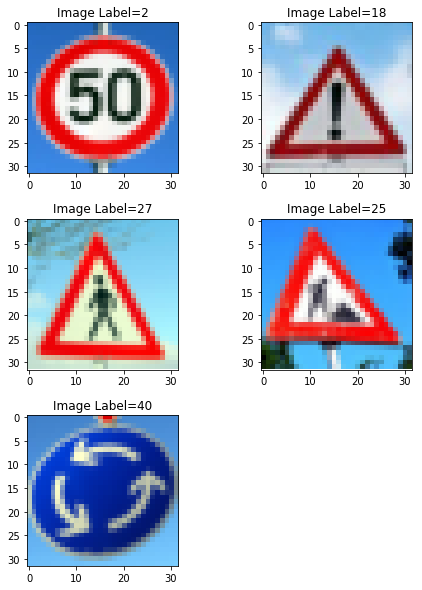

In [15]:
# import tools to load and resize images from the web
from scipy.misc import imread, imresize
import csv
image_path = './test_data_web/'

# load images from the web and corresponding labels
csvfile = open(image_path + 'labels.csv', 'r')
next(csvfile, None)
data_label = csv.reader(csvfile, delimiter=',')
img_name = []
img_label = []
for row in data_label:
    img_name.append(row[0])
    img_label.append(row[1])
   
csvfile.close()

img_name = np.array(img_name)
img_label = np.array(img_label)

# load sign number and name mapping
csvfile = open('signnames.csv', 'r')
next(csvfile, None)
data_sign = csv.reader(csvfile, delimiter=',')
label_num = []
label_name = []
for row in data_sign:
    label_num.append(row[0])
    label_name.append(row[1])
   
csvfile.close()

label_num = np.array(label_num, dtype=int)
label_name = np.array(label_name)

def load_img(path, image_size):
    img = imread(path)
    img = imresize(img, image_size)
    img = norm_rgb(img)  
    img = img.reshape(((1, ) + image_size))
    
    return img

# display all the images
fig = plt.figure(figsize=(8, 10))
fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0.3)
n_img = len(img_name)
for i in range(n_img):
    img_out = load_img(image_path + img_name[i] + '.jpg', image_shape)
    a = fig.add_subplot(np.ceil(n_img/2),2,i+1)
    a.imshow(img_out[0].astype(np.uint8))
    a.set_title('Image Label=' + img_label[i])

### Predict the Sign Type for Each Image

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [16]:
# Find the top 5 softmax prob and labels
# test the function
ind = np.random.randint(0, n_img)
img_test = load_img(image_path + img_name[ind] + '.jpg', image_shape)


def predict_topk(logits, img_data, k):
    top_k = tf.nn.top_k(tf.nn.softmax(logits), k)
    with tf.Session() as sess:
        saver.restore(sess, './mynet')
        out = sess.run(top_k, feed_dict={x: img_data})
    return out


def disp_topk(topk, ax, l_num, l_name):
    topk_prob = topk[0][0]
    topk_labels = topk[1][0]
    for i in range(len(topk_prob)):
        sign_prob = topk_prob[i]
        sign_name = l_name[l_num==topk_labels[i]][0]
        text = sign_name + ':' + str(sign_prob)
        ax.text(32, 0+3*i, text, color='green', fontsize=15, bbox={'facecolor':'black', 'alpha':1, 'pad':1})


### Analyze Performance

Accuracy on new images =  1.0


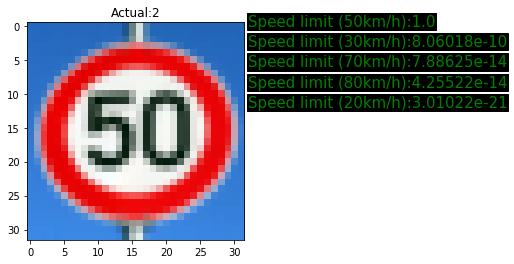

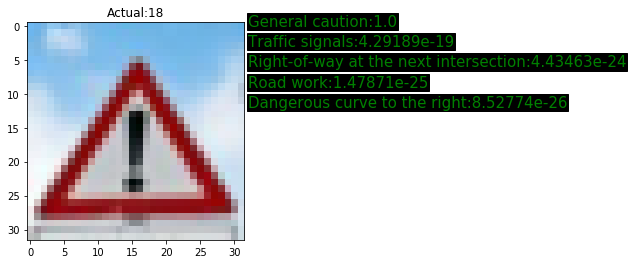

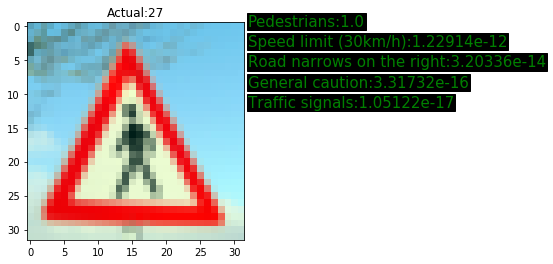

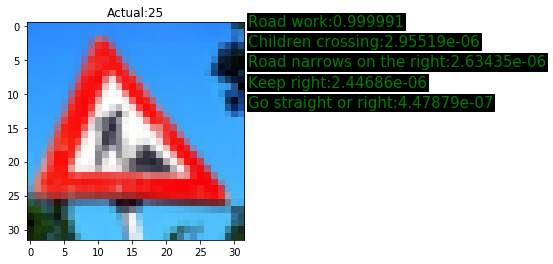

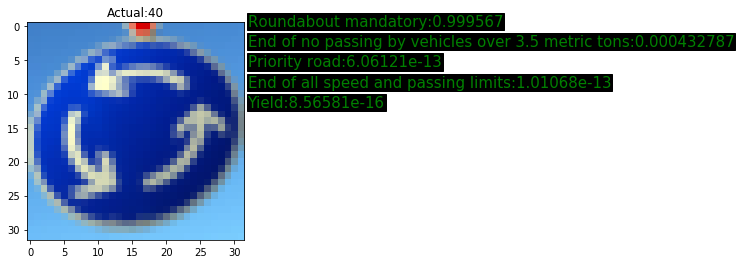

In [17]:
# Calculate the accuracy for the new images. 
# For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

def predict_accuracy(path, image_shape, img_name, img_label, label_num, label_name):
    num_images = len(img_name)
    hit = 0
    fig = plt.figure(figsize=(8, 10))
    fig.subplots_adjust(wspace=1)
    fig.subplots_adjust(hspace=0.3)
    for (i, l) in zip(img_name, img_label):
        img = load_img(path + i + '.jpg', image_shape)
        top5 = predict_topk(logits, img, 5)
        top5_labels = top5[1][0]
        hit += (top5_labels[0] == int(l))
        f, a = plt.subplots()
        a.imshow(img[0].astype(np.uint8))
        a.set_title('Actual:' + img_label[int(i)])
        disp_topk(top5, a, label_num, label_name)
    return hit / num_images

accuracy = predict_accuracy(image_path, image_shape, img_name, img_label, label_num, label_name)

print("Accuracy on new images = ", accuracy)

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 